## Initial Data Exploration

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### Read the dataset

In [46]:
df_complete = pd.read_csv("UFO-Sightings/complete.csv", on_bad_lines='skip')

df_complete


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_29692\3273604830.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complete = pd.read_csv("UFO-Sightings/complete.csv", on_bad_lines='skip')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


### Clean Up Newline Characters in Column Names

In [47]:
# Replace newline characters in column names
df_complete.columns = df_complete.columns.str.replace('\n', ' ')
print("Column names after replacing newline characters:")
print(df_complete.columns)

Column names after replacing newline characters:
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


In [48]:
# Strip leading and trailing whitespace
df_complete.columns = df_complete.columns.str.strip()
print("Column names after stripping whitespace:")
print(df_complete.columns)

Column names after stripping whitespace:
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


In [49]:
# Standardize column names
df_complete.columns = df_complete.columns.str.lower().str.replace(' ', '_')
print("Column names after standardizing:")
print(df_complete.columns)

Column names after standardizing:
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_(seconds)',
       'duration_(hours/min)', 'comments', 'date_posted', 'latitude',
       'longitude'],
      dtype='object')


In [50]:
# Define a dictionary for renaming columns
new_column_names = {
    'datetime': 'sighting_time',
    'city': 'city_name',
    'state': 'state_code',
    'country': 'country_code',
    'shape': 'ufo_shape',
    'duration_(seconds)': 'duration_seconds',
    'duration_(hours/min)': 'duration_text',
    'comments': 'sighting_comments',
    'date_posted': 'report_posted_date',
    'latitude': 'latitude',
    'longitude': 'longitude'
}

# Rename the columns
df_complete.rename(columns=new_column_names, inplace=True)
df_complete

,sighting_time,city_name,state_code,country_code,ufo_shape,duration_seconds,duration_text,sighting_comments,report_posted_date,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


In [51]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sighting_time       88679 non-null  object 
 1   city_name           88679 non-null  object 
 2   state_code          81270 non-null  object 
 3   country_code        76314 non-null  object 
 4   ufo_shape           85757 non-null  object 
 5   duration_seconds    88677 non-null  object 
 6   duration_text       85660 non-null  object 
 7   sighting_comments   88644 non-null  object 
 8   report_posted_date  88679 non-null  object 
 9   latitude            88679 non-null  object 
 10  longitude           88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [52]:
print(df_complete.isnull().sum())

sighting_time             0
city_name                 0
state_code             7409
country_code          12365
ufo_shape              2922
duration_seconds          2
duration_text          3019
sighting_comments        35
report_posted_date        0
latitude                  0
longitude                 0
dtype: int64


In [53]:
print((df_complete.isnull().sum() / len(df_complete)) * 100)

sighting_time          0.000000
city_name              0.000000
state_code             8.354853
country_code          13.943549
ufo_shape              3.295030
duration_seconds       0.002255
duration_text          3.404414
sighting_comments      0.039468
report_posted_date     0.000000
latitude               0.000000
longitude              0.000000
dtype: float64


In [54]:
df_complete.isna().sum()

sighting_time             0
city_name                 0
state_code             7409
country_code          12365
ufo_shape              2922
duration_seconds          2
duration_text          3019
sighting_comments        35
report_posted_date        0
latitude                  0
longitude                 0
dtype: int64

In [55]:
df_complete = df_complete.dropna(subset=['duration_seconds'])
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88677 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sighting_time       88677 non-null  object 
 1   city_name           88677 non-null  object 
 2   state_code          81269 non-null  object 
 3   country_code        76313 non-null  object 
 4   ufo_shape           85755 non-null  object 
 5   duration_seconds    88677 non-null  object 
 6   duration_text       85658 non-null  object 
 7   sighting_comments   88642 non-null  object 
 8   report_posted_date  88677 non-null  object 
 9   latitude            88677 non-null  object 
 10  longitude           88677 non-null  float64
dtypes: float64(1), object(10)
memory usage: 8.1+ MB


In [56]:
df_complete.to_csv("UFO-Sightings/complete_final_cleaned.csv", index=False)

In [64]:
df_complete['state_code'].fillna('unknown', inplace=True)
df_complete['country_code'].fillna('unknown', inplace=True)
df_complete['ufo_shape'].fillna('unknown', inplace=True)
df_complete['duration_text'].fillna('unknown', inplace=True)
df_complete['sighting_comments'].fillna('No comments', inplace=True)
df_complete['duration_seconds'].fillna(0, inplace=True)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76313 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sighting_time       76313 non-null  object 
 1   city_name           76313 non-null  object 
 2   state_code          76313 non-null  object 
 3   country_code        76313 non-null  object 
 4   ufo_shape           76313 non-null  object 
 5   duration_seconds    76313 non-null  float64
 6   duration_text       76313 non-null  object 
 7   sighting_comments   76313 non-null  object 
 8   report_posted_date  76313 non-null  object 
 9   latitude            76313 non-null  object 
 10  longitude           76313 non-null  float64
dtypes: float64(2), object(9)
memory usage: 7.0+ MB


In [65]:
print(df_complete.isnull().sum())


sighting_time         0
city_name             0
state_code            0
country_code          0
ufo_shape             0
duration_seconds      0
duration_text         0
sighting_comments     0
report_posted_date    0
latitude              0
longitude             0
dtype: int64


In [67]:
df_complete.to_csv("UFO-Sightings/final_cleaned_dataset.csv", index=False)
print("Final cleaned dataset saved.")

Final cleaned dataset saved.


In [68]:
categorical_columns = df_complete.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"Feature: {col}")
    print(f"Unique Values: {df_complete[col].nunique()}")
    print(f"Top Values:\n{df_complete[col].value_counts().head(10)}\n")

Feature: sighting_time
Unique Values: 66295
Top Values:
sighting_time
7/4/2012 22:00      31
7/4/2010 22:00      31
11/16/1999 19:00    26
10/31/2004 20:00    25
7/4/2010 21:00      24
7/4/2011 22:00      23
9/19/2009 20:00     23
11/16/1999 18:05    20
11/16/1999 19:05    20
7/4/2012 22:30      20
Name: count, dtype: int64

Feature: city_name
Unique Values: 13546
Top Values:
city_name
seattle        568
phoenix        488
portland       398
las vegas      394
los angeles    372
san diego      360
houston        316
chicago        294
miami          258
tucson         258
Name: count, dtype: int64

Feature: state_code
Unique Values: 68
Top Values:
state_code
ca         9575
wa         4294
fl         4155
tx         3742
ny         3234
unknown    2748
il         2698
az         2617
pa         2520
oh         2465
Name: count, dtype: int64

Feature: country_code
Unique Values: 5
Top Values:
country_code
us    70292
ca     3266
gb     2050
au      593
de      112
Name: count, dtype: in

- Sanitization Recommendations

In [ ]:
# a datetime type for easier analysis
df_complete['sighting_time'] = pd.to_datetime(df_complete['sighting_time'], errors='coerce')

In [70]:
#Identify and correct records where latitude or numerical values ​​are entered incorrectly
invalid_cities = df_complete[df_complete['city_name'].str.match(r'^\d+\.?\d*$')]
print(invalid_cities)

Empty DataFrame
Columns: [sighting_time, city_name, state_code, country_code, ufo_shape, duration_seconds, duration_text, sighting_comments, report_posted_date, latitude, longitude]
Index: []


In [71]:
df_complete['city_name'] = df_complete['city_name'].apply(lambda x: 'unknown' if str(x).replace('.', '').isdigit() else x)

Are UFO sightings more common during specific dates or times?

<Axes: title={'center': 'UFO Sightings Over Years'}, xlabel='year'>

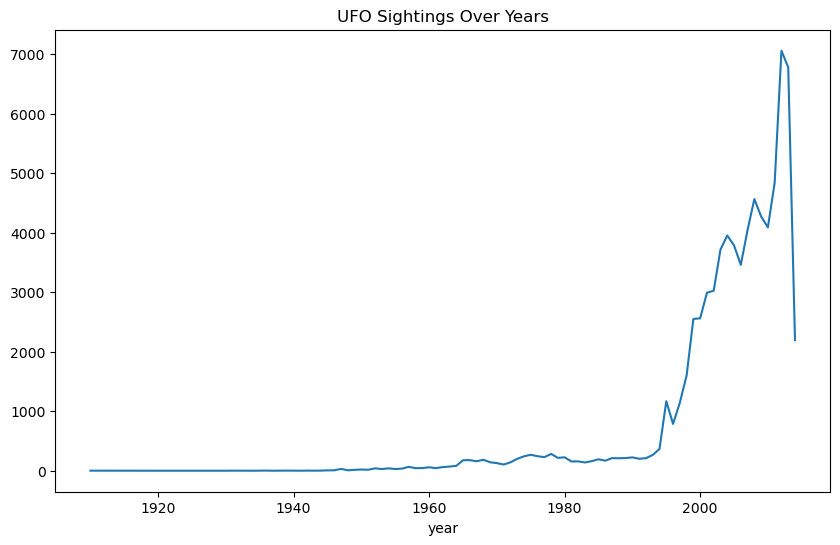

In [ ]:
df_complete['year'] = df_complete['sighting_time'].dt.year
df_complete['month'] = df_complete['sighting_time'].dt.month


sightings_per_year = df_complete.groupby('year').size()
sightings_per_year.plot(kind='line', figsize=(10, 6), title="UFO Sightings Over Years")

There is a sharp increase in sightings post-1980, peaking around the 2000s.

<Axes: title={'center': 'UFO Sightings by Hour of Day'}, xlabel='hour'>

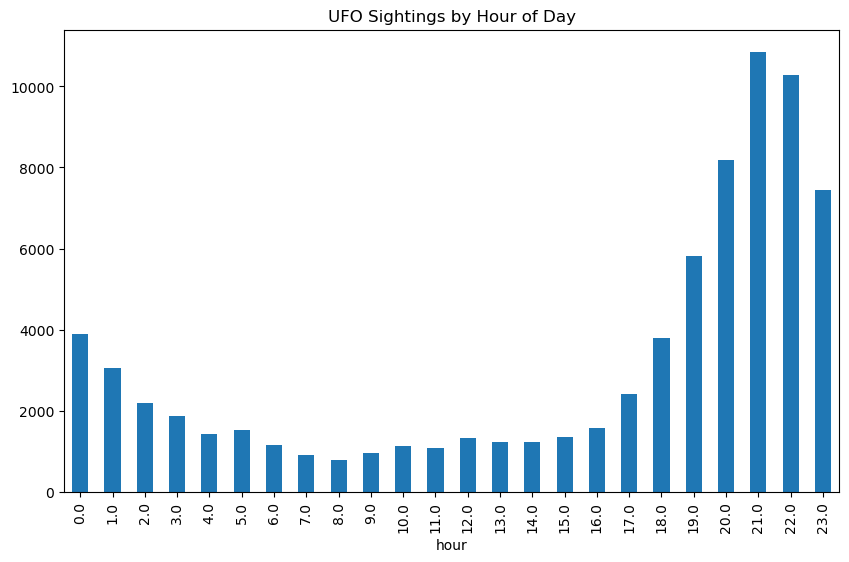

In [ ]:
#Analyze sightings by hour of the day
df_complete['hour'] = df_complete['sighting_time'].dt.hour
sightings_by_hour = df_complete.groupby('hour').size()
sightings_by_hour.plot(kind='bar', figsize=(10, 6), title="UFO Sightings by Hour of Day")

Evening and night hours (8 PM to midnight) have the highest number of sightings, with a steep decline in the early morning hours.

Which cities, states, or countries have the most UFO activity?

<Axes: title={'center': 'UFO Sightings by State'}, xlabel='state_code'>

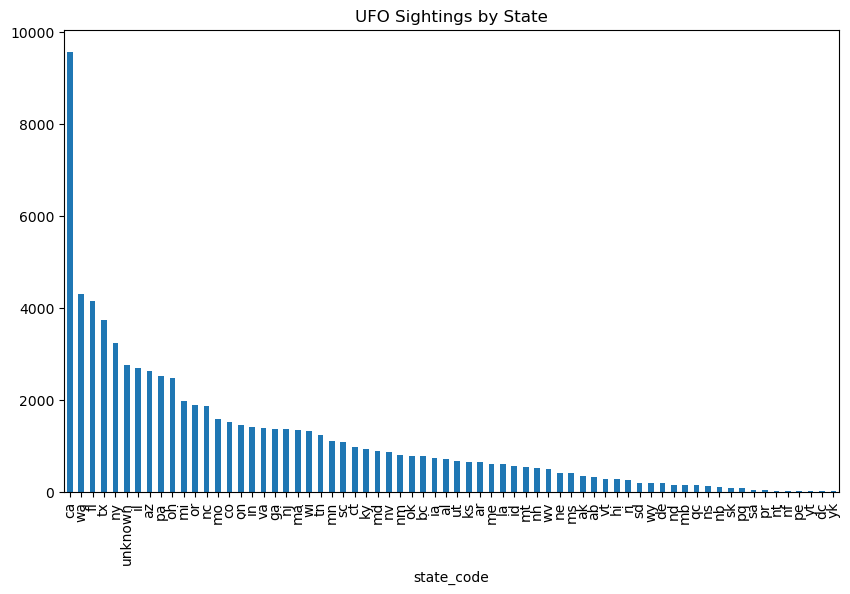

In [74]:
df_complete['city_name'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Cities with Most UFO Sightings")
df_complete['state_code'].value_counts().plot(kind='bar', figsize=(10, 6), title="UFO Sightings by State")

<Axes: title={'center': 'UFO Sightings by Month'}, xlabel='sighting_time'>

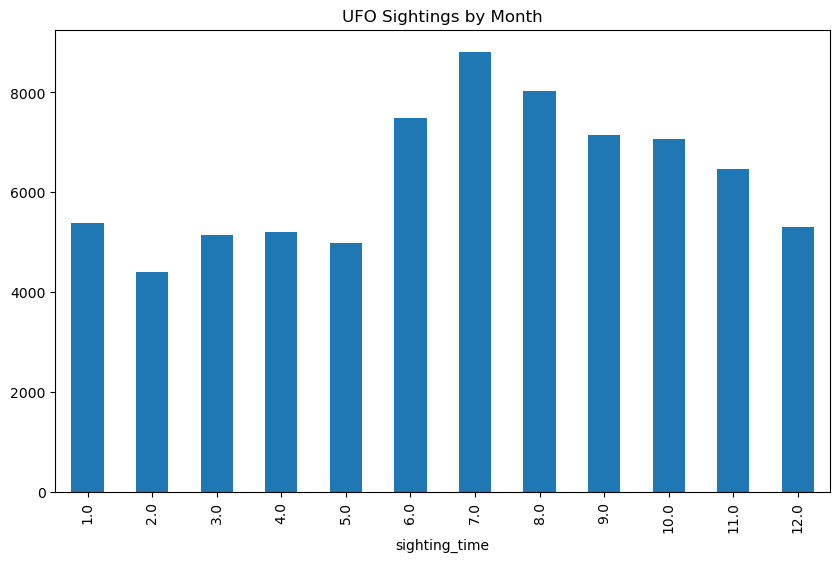

In [75]:
sightings_by_month = df_complete.groupby(df_complete['sighting_time'].dt.month).size()
sightings_by_month.plot(kind='bar', figsize=(10, 6), title="UFO Sightings by Month")

<Axes: title={'center': 'UFO Sightings by Decade'}, xlabel='decade'>

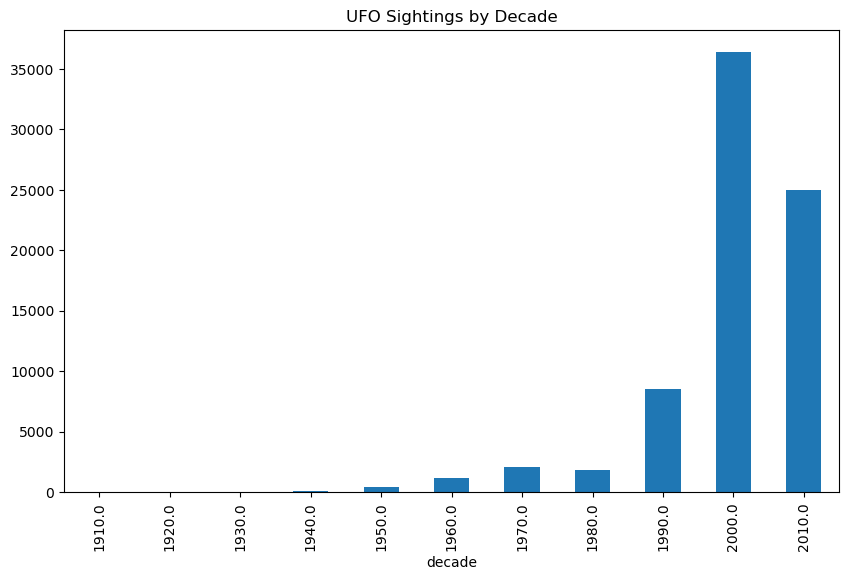

In [76]:
df_complete['decade'] = (df_complete['year'] // 10) * 10
sightings_by_decade = df_complete.groupby('decade').size()
sightings_by_decade.plot(kind='bar', figsize=(10, 6), title="UFO Sightings by Decade")

<Axes: title={'center': 'Top 10 States with Most UFO Sightings'}, xlabel='state_code'>

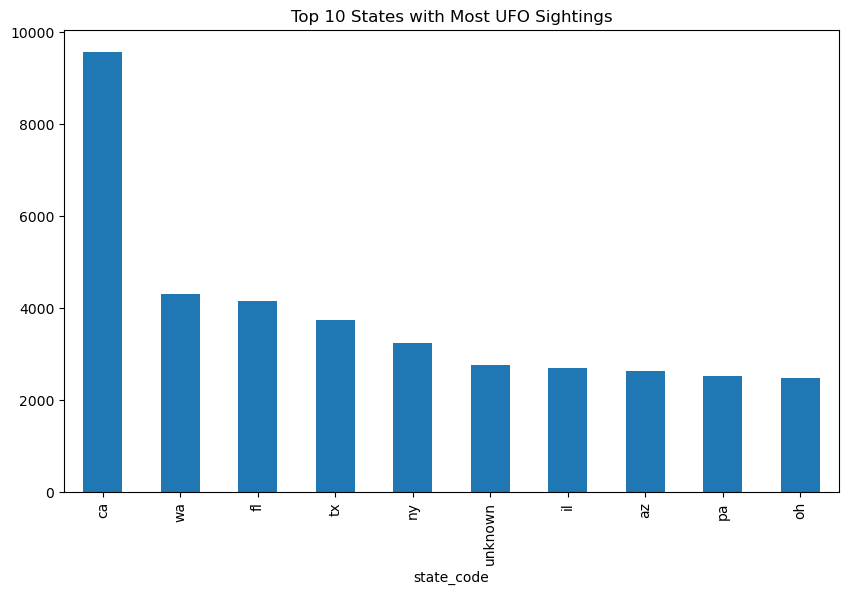

In [77]:
top_states = df_complete['state_code'].value_counts().head(10)
top_states.plot(kind='bar', figsize=(10, 6), title="Top 10 States with Most UFO Sightings")

Address Missing Data
We investigate records with unknown state codes. We can try imputing missing states using the city_name column.

In [78]:
unknown_states = df_complete[df_complete['state_code'] == 'unknown']
print(f"Number of records with unknown state codes: {len(unknown_states)}")
unknown_states.head()

Number of records with unknown state codes: 2748


,sighting_time,city_name,state_code,country_code,ufo_shape,duration_seconds,duration_text,sighting_comments,report_posted_date,latitude,longitude,year,month,hour,decade
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955.0,10.0,17.0,1950.0
6,1965-10-10 21:00:00,penarth (uk/wales),unknown,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000,1965.0,10.0,21.0,1960.0
21,1974-10-10 21:30:00,cardiff (uk/wales),unknown,gb,disk,1200.0,20 minutes,back in 1974 I was 19 at the time and lived i...,2/1/2007,51.5,-3.200000,1974.0,10.0,21.0,1970.0
25,1976-10-10 22:00:00,stoke mandeville (uk/england),unknown,gb,cigar,3.0,3 seconds,White object over Buckinghamshire UK.,12/12/2009,51.783333,-0.783333,1976.0,10.0,22.0,1970.0
40,1985-10-10 20:25:00,leeds (uk/england),unknown,gb,triangle,600.0,10min,three light in the sky that led to a big black...,3/4/2003,53.8,-1.583333,1985.0,10.0,20.0,1980.0
